In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn import ensemble

import graphviz
from matplotlib.colors import ListedColormap
from itertools import product

## Load and split the data

In [2]:
df = pd.read_csv("~/Projects/HW_ML/data/data-classification/haberman.data",
                 header=0,
                 )
df.columns = ["Age", "Operation year", "Positive nodes", "Survival"]

# let's fill the column with next values:
# 0 if patient died within 5 years
# 1 if patient survived
df["Survival"] = -(df["Survival"] - 2)

In [3]:
# check if there are missing numbers
# spoiler: there aren't any, rtfm for ds :)
df.isnull().sum()

Age               0
Operation year    0
Positive nodes    0
Survival          0
dtype: int64

In [4]:
X = df[["Age", "Positive nodes"]] # year is useless, ok?
x_train, x_test, y_train, y_test = train_test_split(X, df["Survival"], train_size=.8)

## Implement summary function

 - accuracy on train set
 - accuracy on test set

 Since we are working with medical data,
 it's necessary to implement these:

 - precision: $\frac{tp}{tp+fp}$
 - fall-out: $\frac{fp}{fp+tn}$

 Visualization

 - confusion matrices

In [5]:
def summary(model,
            x_train, x_test,
            y_train, y_test):
    """
    prints accuracy for both train and test sets
    plots 4 fancy confusion matrices

    :param model: a trained classifier
    :param x_train: train set variables
    :param x_test: test set variables
    :param y_train: train set labels
    :param y_test: test set labels
    :return: None
    """
    print(f"Train set accuracy: {model.score(x_train, y_train)*100:.2f}%")
    print(f"Test set accuracy: {model.score(x_test, y_test)*100:.2f}%")

    confusion_train = confusion_matrix(y_train, model.predict(x_train))
    confusion_test  = confusion_matrix(y_test, model.predict(x_test))

    precision_train = confusion_train[0,0] / (confusion_train[0,0] + confusion_train[0,1])
    precision_test  = confusion_test[0,0] / (confusion_test[0,0] + confusion_test[0,1])

    fallout_train = confusion_train[0,1] / (confusion_train[0,1] + confusion_train[1,1])
    fallout_test  = confusion_test[0,1] / (confusion_test[0,1] + confusion_test[1,1])

    print(f"Train set precision = {precision_train:.4f}, fallout = {fallout_train:.4f}")
    print(f"Test set precision = {precision_test :.4f}, fallout = {fallout_test :.4f}")

    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
    plot_confusion_matrix(model, x_train, y_train,
                     display_labels=["Dead", "Alive"],
                     xticks_rotation="horizontal",
                     normalize=None, ax=axes[0,0])
    plot_confusion_matrix(model, x_train, y_train,
                     display_labels=["Dead", "Alive"],
                     xticks_rotation="horizontal",
                     normalize='true', ax=axes[0,1])
    plot_confusion_matrix(model, x_test, y_test,
                     display_labels=["Dead", "Alive"],
                     xticks_rotation="horizontal",
                     normalize=None, ax=axes[1,0])
    plot_confusion_matrix(model, x_test, y_test,
                     display_labels=["Dead", "Alive"],
                     xticks_rotation="horizontal",
                     normalize='true', ax=axes[1,1])
    axes[0,0].set_title("Train set - numbers")
    axes[0,1].set_title("Train set - probabilities")
    axes[1,0].set_title("Test set - numbers")
    axes[1,1].set_title("Test set - probabilities")

## SVM

### Plot data and make a decision about choosing kernel

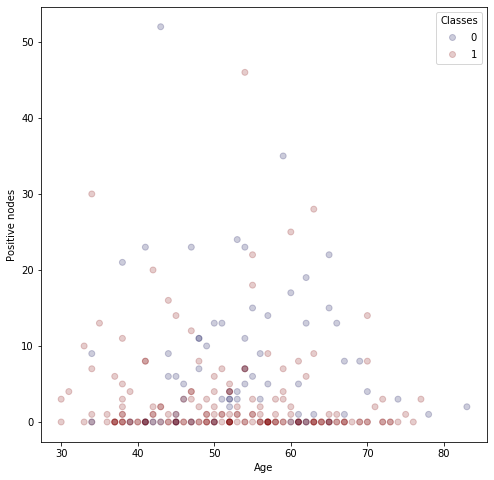

In [6]:
# лаби змінюються, а костилі вічні
if not isinstance(x_train, np.ndarray):
    features = x_train[["Age", "Positive nodes"]].to_numpy()
else:
    features = x_train
    
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(features[:,0], features[:,1],
            alpha=0.2,
            #s=100*features[3], 
            c=y_train, cmap='seismic')
ax.set_xlabel("Age")
ax.set_ylabel("Positive nodes")
ax.legend(*scatter.legend_elements(),
                  loc="upper right", 
                  title="Classes")

### Implement decision boundary visualization

In [7]:
def plot_svm_boundary(clf, X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots(figsize=(8,8))
    
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())    

### Linear kernel

/home/olga/Projects/CPI/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train set accuracy: 73.36%
Test set accuracy: 73.77%
Train set precision = 0.0154, fallout = 0.2645
Test set precision = 0.0000, fallout = 0.2623


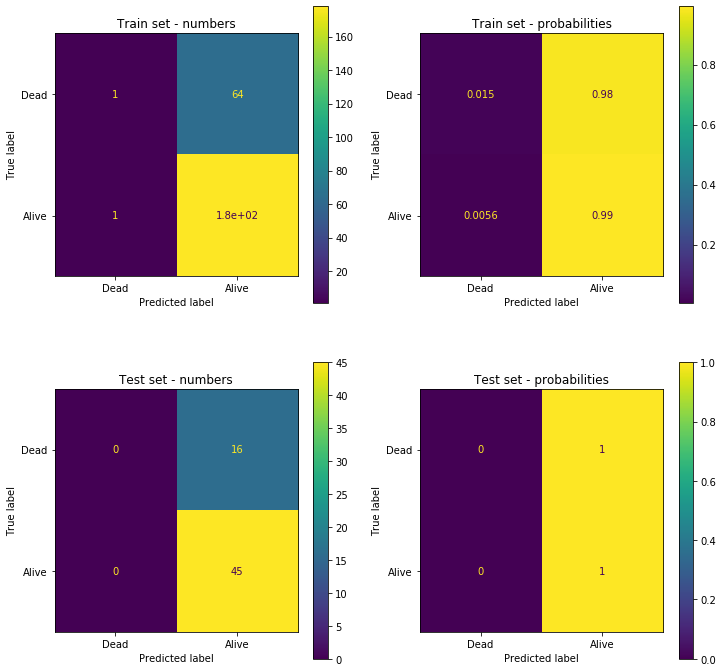

In [8]:
model = LinearSVC().fit(x_train, y_train)
summary(model, x_train, x_test, y_train, y_test)

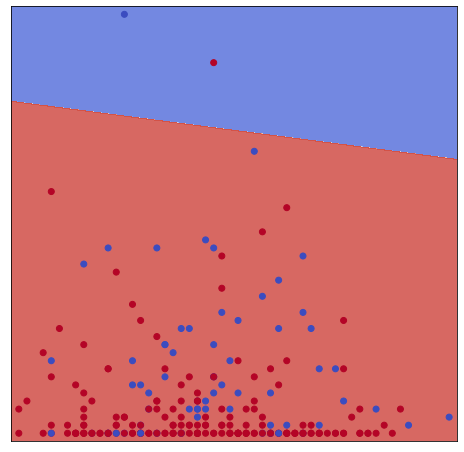

In [9]:
# лаби змінюються, а костилі вічні
if not isinstance(x_train, np.ndarray):
    x_train = x_train.to_numpy()
    y_train_1 = y_train.to_numpy().reshape(y_train.shape[0])
    x_test = x_test.to_numpy()
    y_test_1 = y_test.to_numpy().reshape(y_test.shape[0])
plot_svm_boundary(model, x_train, y_train)

### Polynomial kernel

In [10]:
degrees = [2,3,4,5]

train_accuracies = []
test_accuracies  = []

for d in degrees:
    # тренуємо модель
    model = SVC(kernel="poly", degree=d).fit(x_train, y_train_1)
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

best_train, train_accuracy = degrees[np.argmax(train_accuracies)], np.max(train_accuracies)
best_valid, test_accuracy = degrees[np.argmax(test_accuracies)], np.max(test_accuracies)

print("Polynomial kernel degrees")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with d={best_train}")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with d={best_valid}")


Polynomial kernel degrees
Best training accuracy 76.23% with d=3
Best validation accuracy 72.13% with d=3


Train set accuracy: 75.00%
Test set accuracy: 70.49%
Train set precision = 0.1385, fallout = 0.2435
Test set precision = 0.0000, fallout = 0.2712


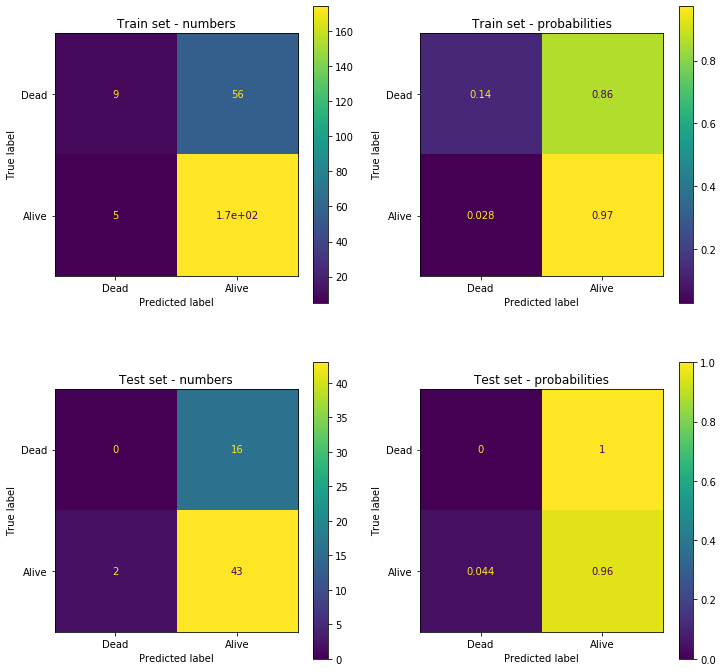

In [11]:
model = SVC(kernel="poly", degree=2).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

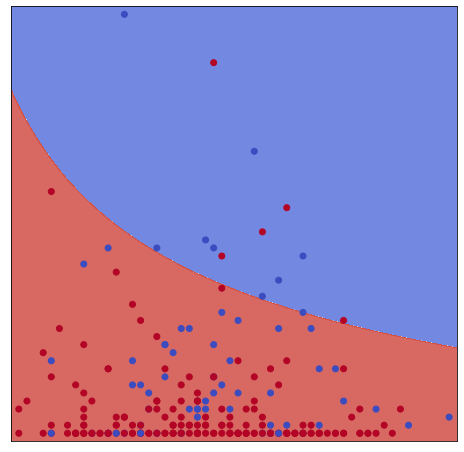

In [12]:
plot_svm_boundary(model, x_train, y_train)

Train set accuracy: 76.23%
Test set accuracy: 72.13%
Train set precision = 0.2308, fallout = 0.2262
Test set precision = 0.0625, fallout = 0.2586


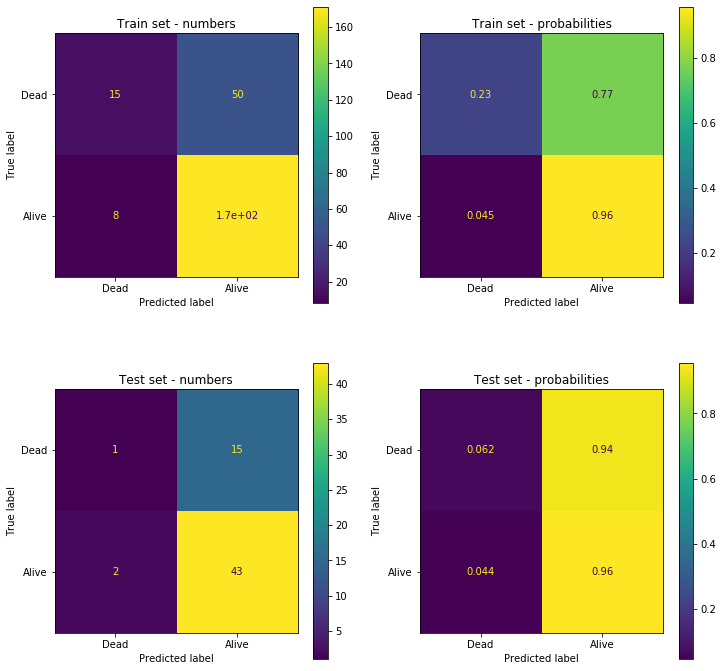

In [13]:
model = SVC(kernel="poly", degree=3).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

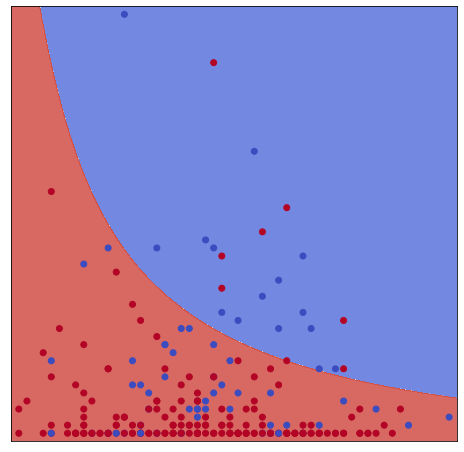

In [14]:
plot_svm_boundary(model, x_train, y_train)

### Exponential kernel

In [15]:
gammas = ["scale", "auto", 1, 5]

train_accuracies = []
test_accuracies  = []

for g in gammas:
    # тренуємо модель
    model = SVC(kernel="rbf", gamma=g).fit(x_train, y_train_1)
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

best_train, train_accuracy = degrees[np.argmax(train_accuracies)], np.max(train_accuracies)
best_valid, test_accuracy = degrees[np.argmax(test_accuracies)], np.max(test_accuracies)

print("Exponential kernel coefs")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with gamma={best_train}")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with gamma={best_valid}")

Exponential kernel coefs
Best training accuracy 93.03% with gamma=5
Best validation accuracy 73.77% with gamma=4


Train set accuracy: 93.03%
Test set accuracy: 73.77%
Train set precision = 0.7385, fallout = 0.0867
Test set precision = 0.0000, fallout = 0.2623


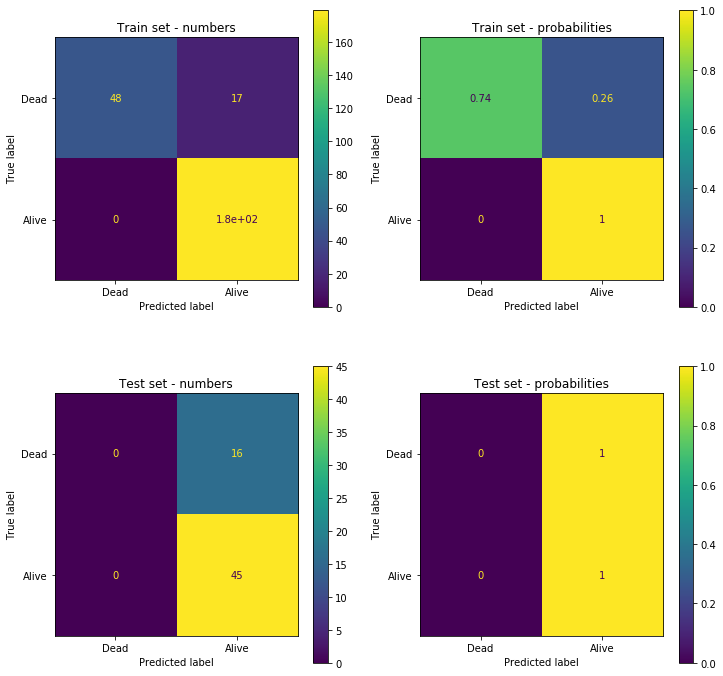

In [16]:
model = SVC(kernel="rbf", gamma=5).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

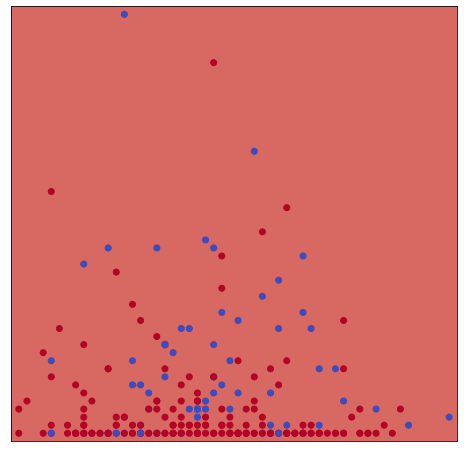

In [17]:
plot_svm_boundary(model, x_train, y_train)

Train set accuracy: 90.57%
Test set accuracy: 72.13%
Train set precision = 0.6462, fallout = 0.1139
Test set precision = 0.0625, fallout = 0.2586


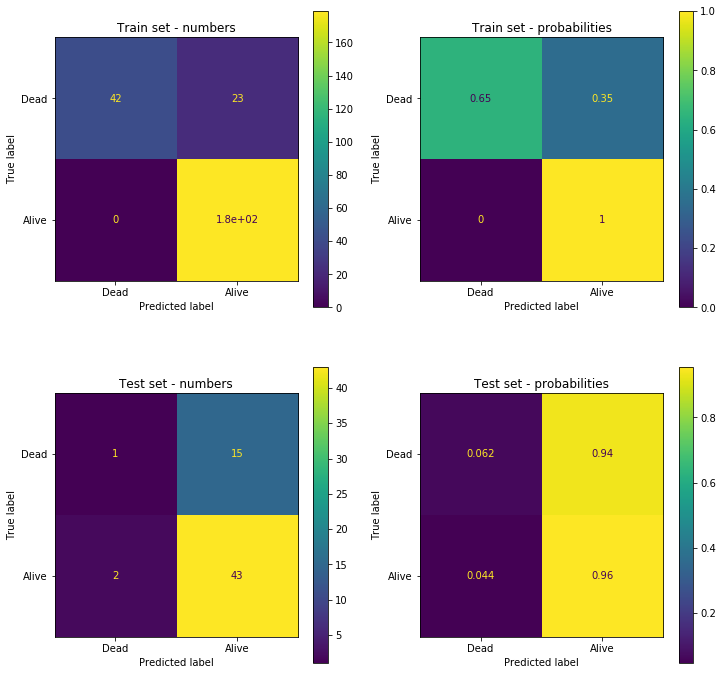

In [18]:
model = SVC(kernel="rbf", gamma="auto").fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

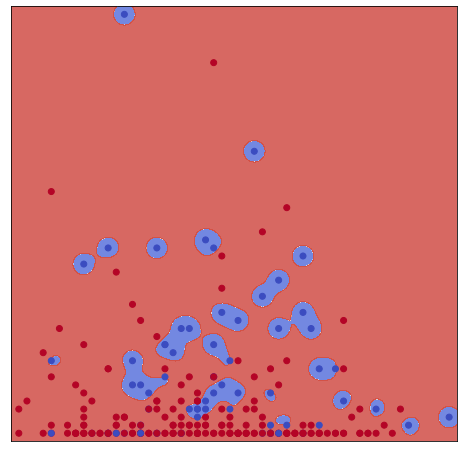

In [19]:
plot_svm_boundary(model, x_train, y_train)

### Tanh kernel

In [20]:
gammas = ["scale", "auto", 1, 5]

train_accuracies = []
test_accuracies  = []

for g in gammas:
    # тренуємо модель
    model = SVC(kernel="sigmoid", gamma=g).fit(x_train, y_train_1)
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

best_train, train_accuracy = degrees[np.argmax(train_accuracies)], np.max(train_accuracies)
best_valid, test_accuracy = degrees[np.argmax(test_accuracies)], np.max(test_accuracies)

print("Exponential kernel coefs")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with gamma={best_train}")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with gamma={best_valid}")

Exponential kernel coefs
Best training accuracy 73.36% with gamma=3
Best validation accuracy 73.77% with gamma=3


Train set accuracy: 93.03%
Test set accuracy: 73.77%
Train set precision = 0.7385, fallout = 0.0867
Test set precision = 0.0000, fallout = 0.2623


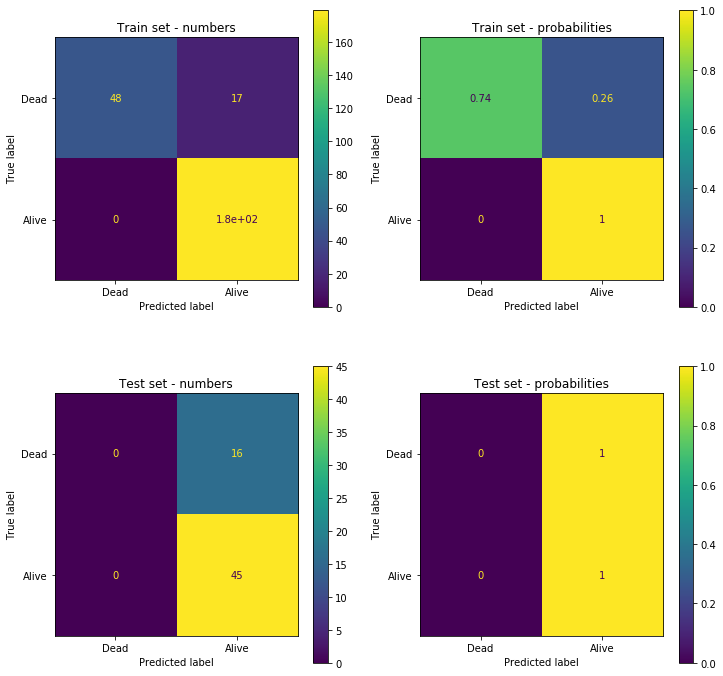

In [21]:
model = SVC(kernel="rbf", gamma=2).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

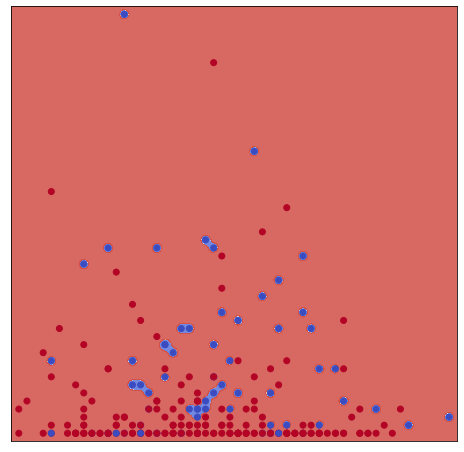

In [22]:
plot_svm_boundary(model, x_train, y_train)

Добрий вечір, з вами програма overfit

Train set accuracy: 90.57%
Test set accuracy: 72.13%
Train set precision = 0.6462, fallout = 0.1139
Test set precision = 0.0625, fallout = 0.2586


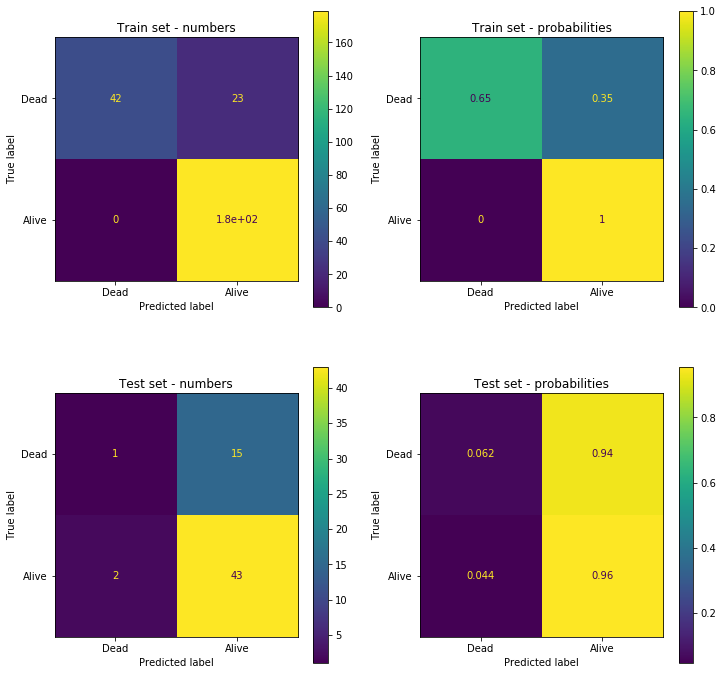

In [23]:
model = SVC(kernel="rbf", gamma="auto").fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

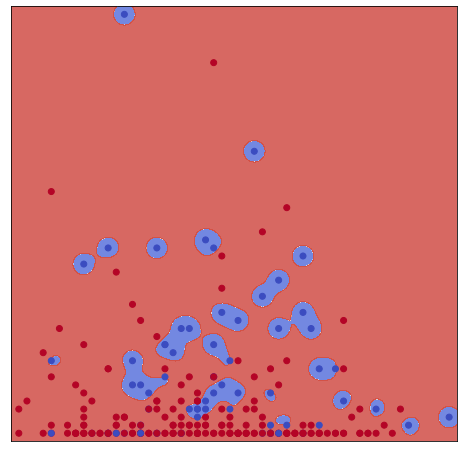

In [24]:
plot_svm_boundary(model, x_train, y_train)

## Decision trees

### Implement decision boundary visualization

In [25]:
def plot_tree_boundary(clf, X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots(figsize=(8,8))
    
    h=0.02
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) 
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.jet, alpha=.8)
    ax.scatter(X[:, 0], X[:, 1], 
               c=y_train, cmap=cm_bright, alpha=0.6, 
               linewidths=0.6, edgecolors="white")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())    

### Trees

Train set accuracy: 93.03%
Test set accuracy: 67.21%
Train set precision = 0.8308, fallout = 0.0598
Test set precision = 0.1250, fallout = 0.2642


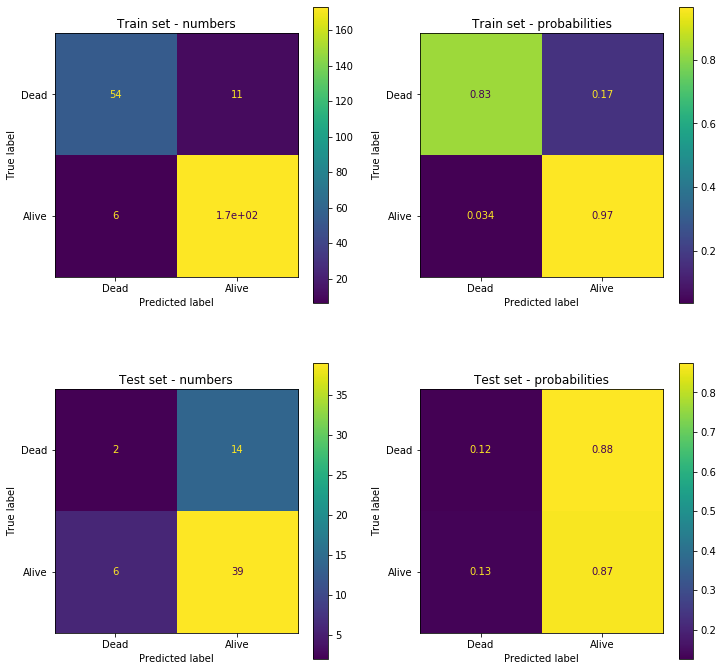

In [26]:
model = tree.DecisionTreeClassifier(criterion="entropy").fit(x_train, y_train)
summary(model, x_train, x_test, y_train, y_test)

In [27]:
# озброюємося садовими ножицями
leaves = [1,2,5,7,10,20, 40]

train_accuracies = []
test_accuracies  = []

for leaf in leaves:
    # тренуємо модель
    model = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=leaf).fit(x_train, y_train_1)
    
    # додаємо трохи візуалізації
    dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=["Age", "Nodes"],  
                     class_names=["Dead", "Alive"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data, format="png")  
    graph.render(f"./plot/{leaf}-leaves") # збережемо, нащо в коді воно
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

best_train, train_accuracy = leaves[np.argmax(train_accuracies)], np.max(train_accuracies)
best_valid, test_accuracy = leaves[np.argmax(test_accuracies)], np.max(test_accuracies)

print("How many samples in one leaf should we choose?")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with {best_train} samples")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with {best_valid} samples")


How many samples in one leaf should we choose?
Best training accuracy 93.03% with 1 samples
Best validation accuracy 72.13% with 20 samples


Train set accuracy: 79.92%
Test set accuracy: 68.85%
Train set precision = 0.5692, fallout = 0.1505
Test set precision = 0.2500, fallout = 0.2400


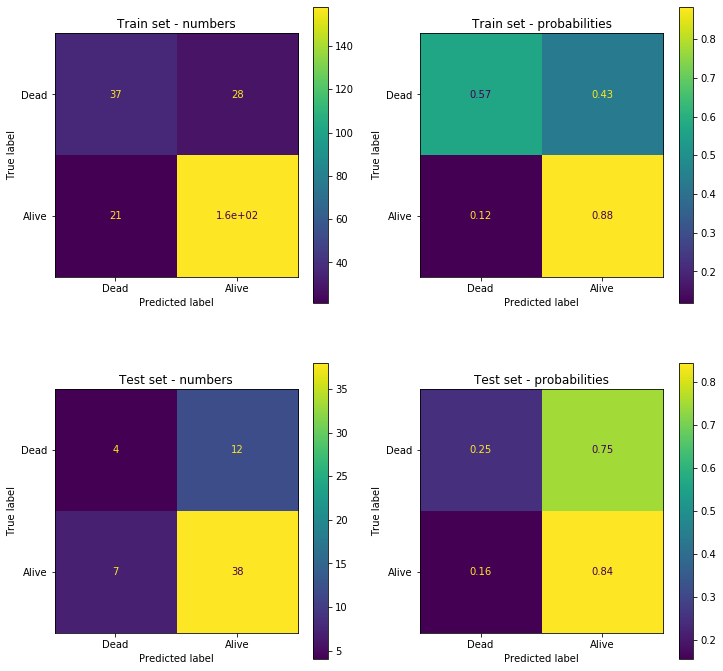

In [50]:
model = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=7).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

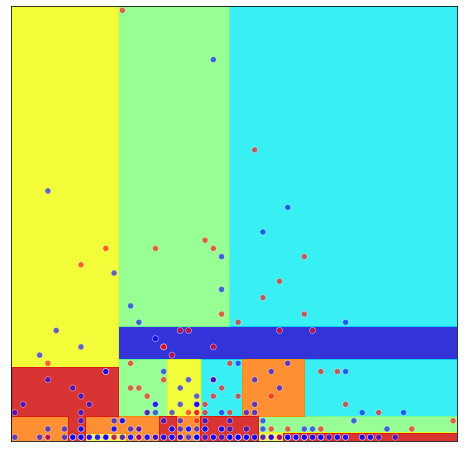

In [29]:
plot_tree_boundary(model, x_train, y_train)

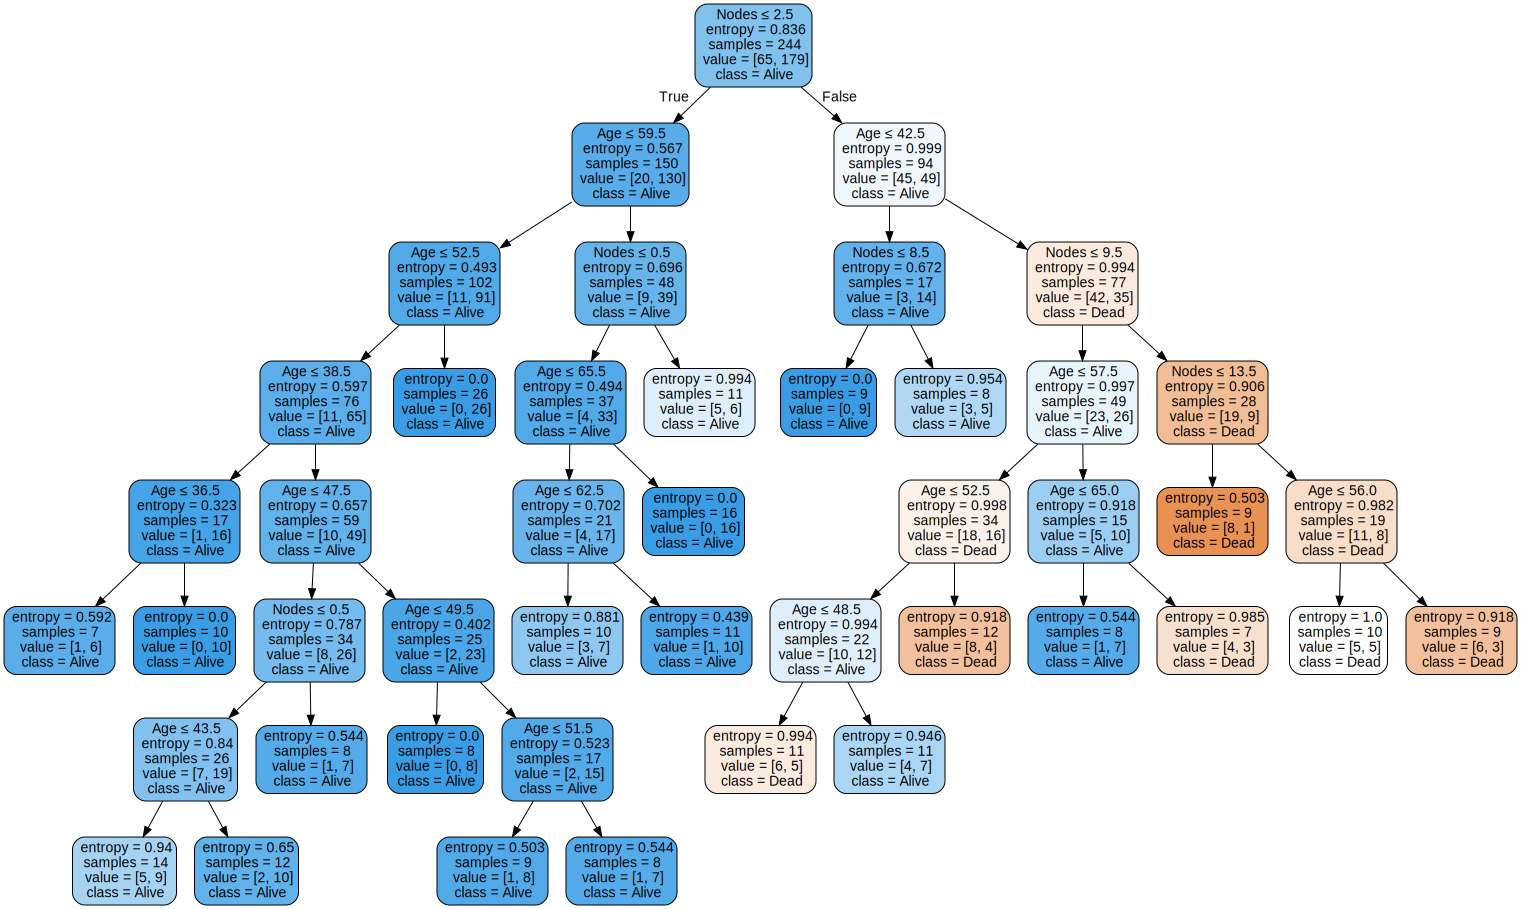

In [30]:
model = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=7).fit(x_train, y_train_1)
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=["Age", "Nodes"],  
                     class_names=["Dead", "Alive"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data, format="png")  
# graph.render("7-leaf")
graph

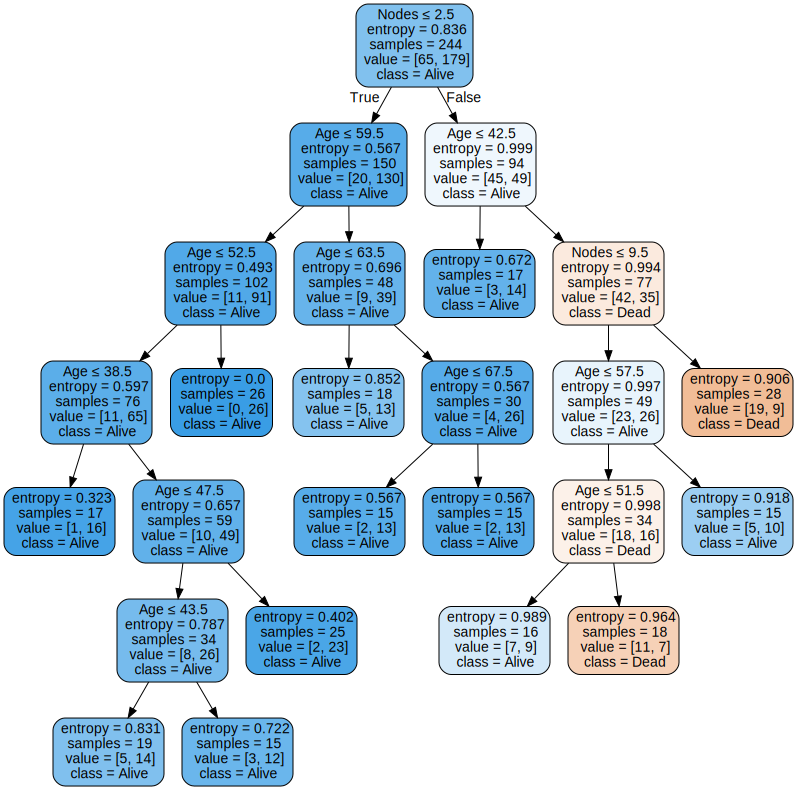

In [31]:
model = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=15).fit(x_train, y_train_1)
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=["Age", "Nodes"],  
                     class_names=["Dead", "Alive"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Boosting

### AdaBoost

Train set accuracy: 80.74%
Test set accuracy: 70.49%
Train set precision = 0.4769, fallout = 0.1700
Test set precision = 0.2500, fallout = 0.2353


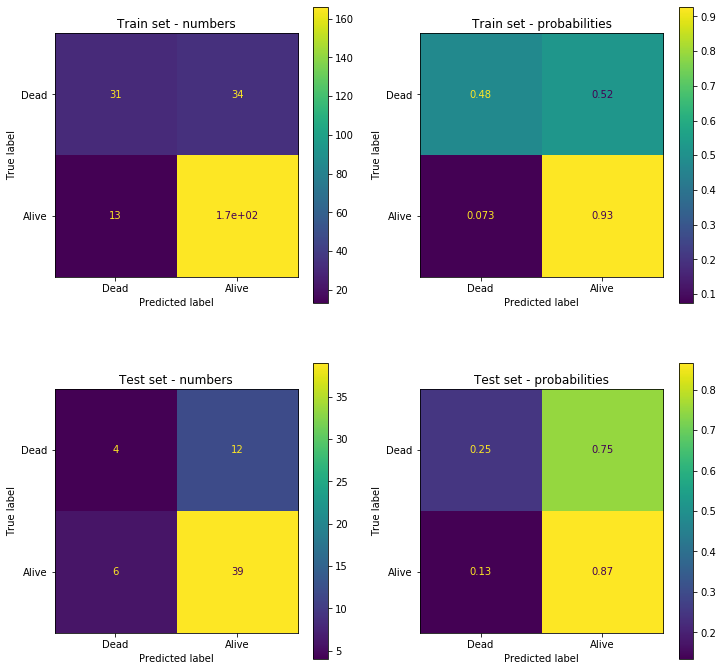

In [32]:
model = ensemble.AdaBoostClassifier().fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

In [57]:
estimators = [5, 10, 20, 50, 100, 150, 200]

train_accuracies = []
test_accuracies  = []

for n in estimators:
    # тренуємо модель
    model = ensemble.AdaBoostClassifier(n_estimators=n, algorithm="SAMME").fit(x_train, y_train_1)
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

best_train, train_accuracy = estimators[np.argmax(train_accuracies)], np.max(train_accuracies)
best_valid, test_accuracy = estimators[np.argmax(test_accuracies)], np.max(test_accuracies)

print("How many estimators should we choose?")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with {best_train} estimators")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with {best_valid} estimators")


How many estimators should we choose?
Best training accuracy 79.92% with 200 estimators
Best validation accuracy 75.41% with 10 estimators


Train set accuracy: 84.84%
Test set accuracy: 65.57%
Train set precision = 0.5385, fallout = 0.1485
Test set precision = 0.1875, fallout = 0.2600


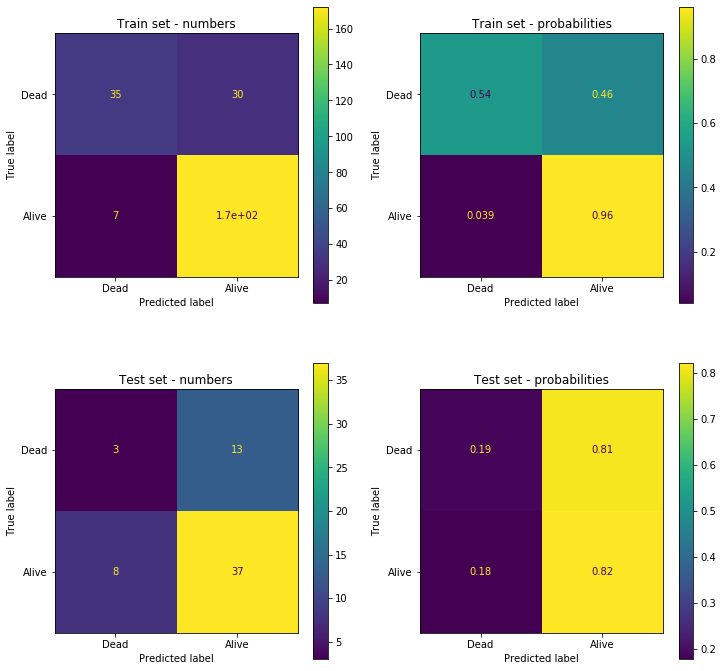

In [58]:
model = ensemble.AdaBoostClassifier(n_estimators=200).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

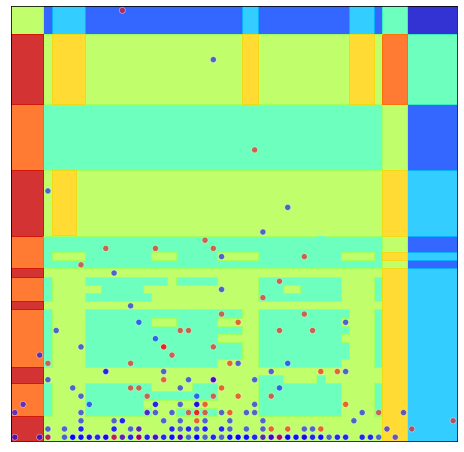

In [53]:
plot_tree_boundary(model, x_train, y_train)

Welcome to overfitting club!

Train set accuracy: 79.51%
Test set accuracy: 68.85%
Train set precision = 0.4615, fallout = 0.1759
Test set precision = 0.2500, fallout = 0.2400


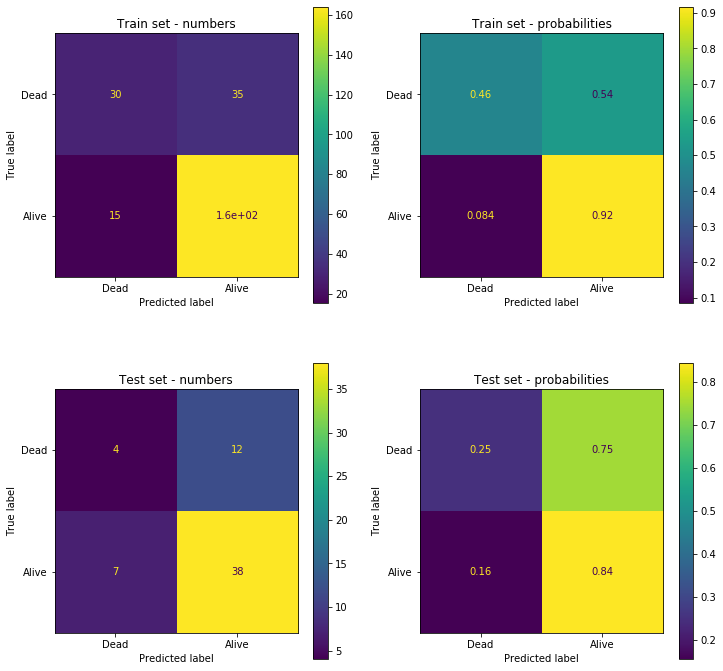

In [54]:
model = ensemble.AdaBoostClassifier(n_estimators=10).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

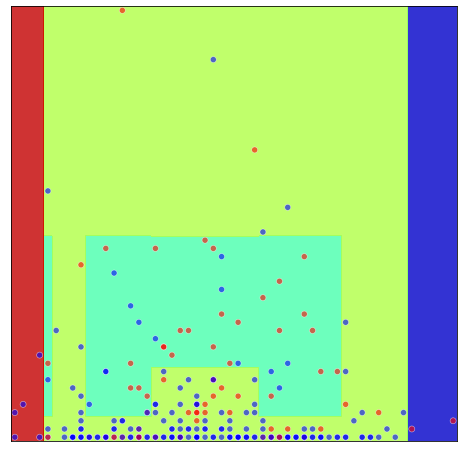

In [55]:
plot_tree_boundary(model, x_train, y_train)

### Gradient Boosting

Train set accuracy: 88.93%
Test set accuracy: 70.49%
Train set precision = 0.6308, fallout = 0.1200
Test set precision = 0.1250, fallout = 0.2545


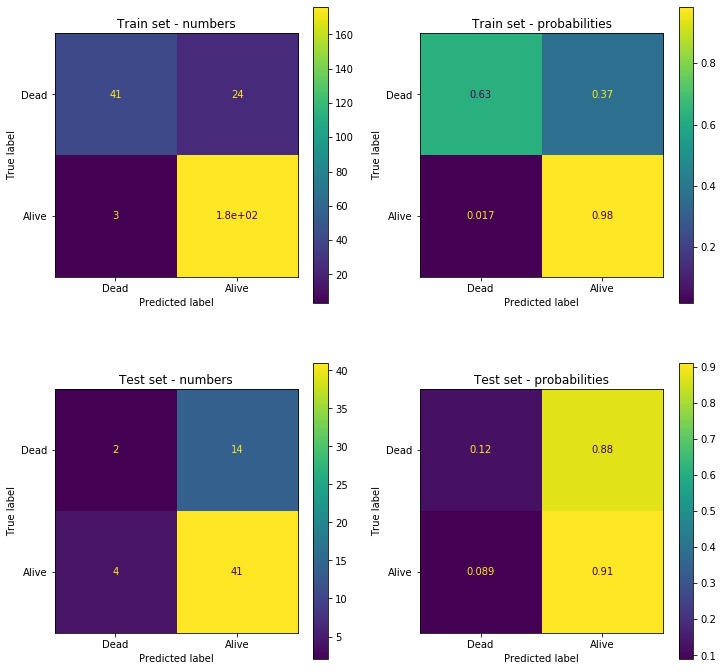

In [36]:
model = ensemble.GradientBoostingClassifier().fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

In [37]:
# time to perform grid search!

estimators = [5, 10, 20, 50, 100, 150, 200]
learning_rates = [0.01, 0.1, 0.5, 1, 2, 5, 10]

param_product = list(product(estimators, learning_rates))

train_accuracies = []
test_accuracies  = []

for i in tqdm(range(len(param_product)), desc = "parameter search"):
    # витягаємо пару параметрів
    n, lr = param_product[i]
    
    # тренуємо модель
    model = ensemble.GradientBoostingClassifier(n_estimators=n, learning_rate=lr).fit(x_train, y_train_1)
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

(train_estim, train_lr), train_accuracy = param_product[np.argmax(train_accuracies)], np.max(train_accuracies)
(valid_estim, valid_lr), test_accuracy = param_product[np.argmax(test_accuracies)], np.max(test_accuracies)

print("Which parameters should we choose?")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with {train_estim} estimators, lr = {train_lr}")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with {valid_estim} estimators, lr = {valid_lr}")


parameter search: 100%|██████████| 49/49 [00:02<00:00, 21.76it/s] 

Which parameters should we choose?
Best training accuracy 93.03% with 100 estimators, lr = 0.5
Best validation accuracy 75.41% with 10 estimators, lr = 1


Train set accuracy: 93.03%
Test set accuracy: 70.49%
Train set precision = 0.7385, fallout = 0.0867
Test set precision = 0.1250, fallout = 0.2545


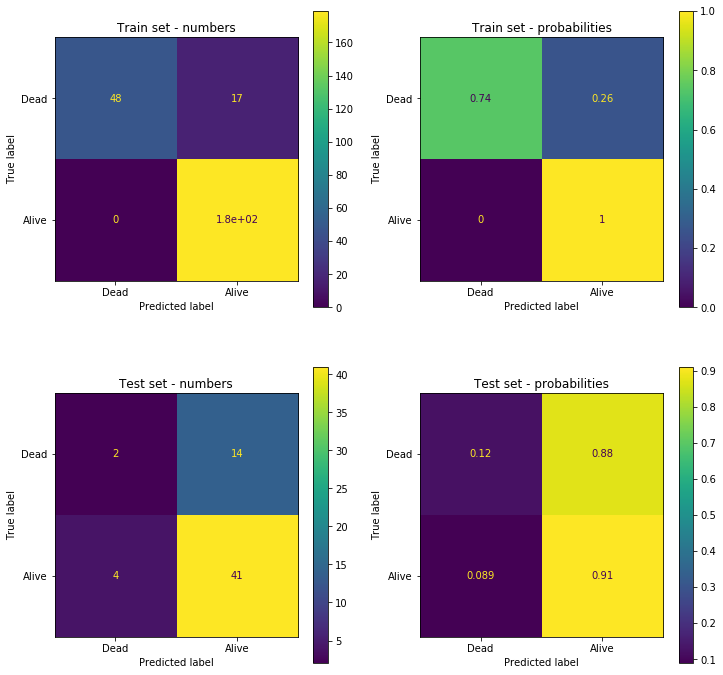

In [38]:
model = ensemble.GradientBoostingClassifier(n_estimators=train_estim, learning_rate=train_lr).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

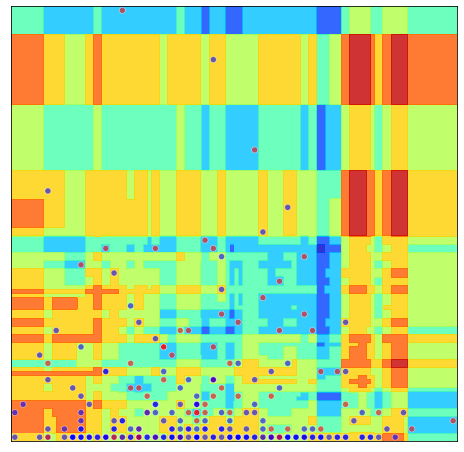

In [39]:
plot_tree_boundary(model, x_train, y_train)

Train set accuracy: 86.89%
Test set accuracy: 70.49%
Train set precision = 0.5538, fallout = 0.1415
Test set precision = 0.0625, fallout = 0.2632


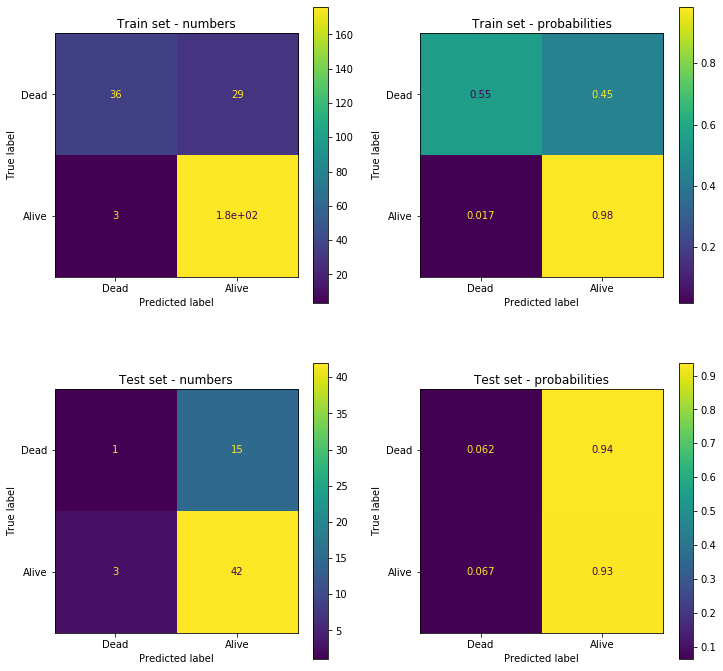

In [40]:
model = ensemble.GradientBoostingClassifier(n_estimators=valid_estim, learning_rate=valid_lr).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

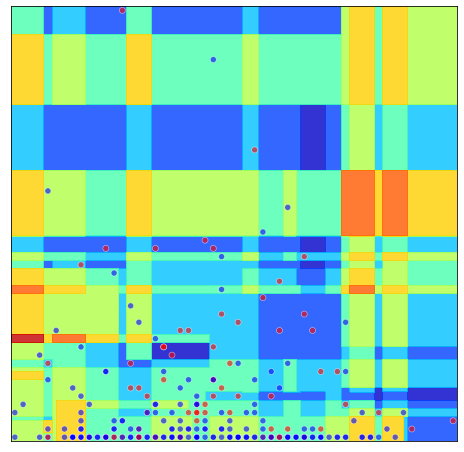

In [41]:
plot_tree_boundary(model, x_train, y_train)

## Random Forest

Train set accuracy: 93.03%
Test set accuracy: 70.49%
Train set precision = 0.7385, fallout = 0.0867
Test set precision = 0.1250, fallout = 0.2545


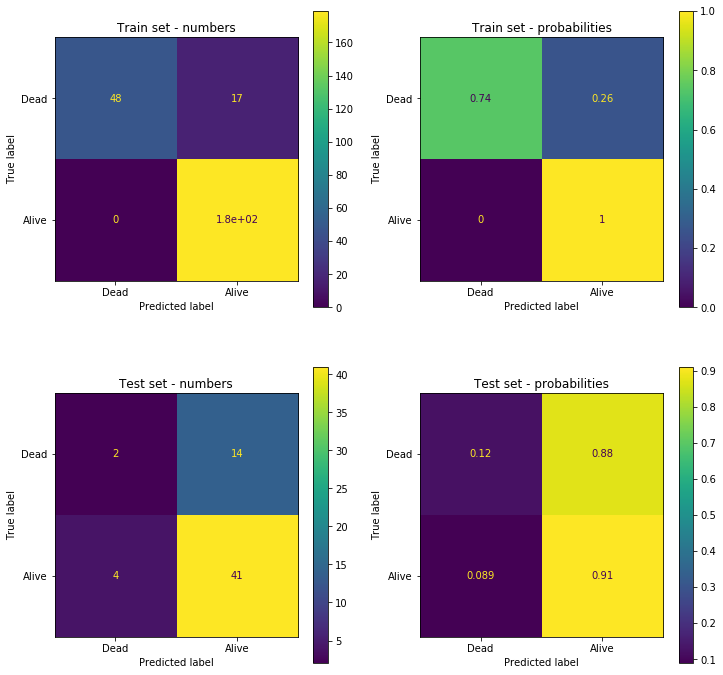

In [42]:
model = ensemble.RandomForestClassifier().fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

In [43]:
estimators = [5, 10, 20, 50, 100, 150, 200]

train_accuracies = []
test_accuracies  = []

for n in estimators:
    # тренуємо модель
    model = ensemble.RandomForestClassifier(n_estimators=n).fit(x_train, y_train_1)
    
    # порахуємо точність прогнозу
    diff = model.predict(x_train) - y_train_1
    train_accuracies.append(
        (diff[diff == 0]+1).sum() / y_train_1.shape[0]
    )
    diff = model.predict(x_test) - y_test_1
    test_accuracies.append(
         (diff[diff == 0]+1).sum() / y_test_1.shape[0]
    )

train_accuracies = np.array(train_accuracies)
test_accuracies = np.array(test_accuracies)

best_train, train_accuracy = estimators[np.argmax(train_accuracies)], np.max(train_accuracies)
best_valid, test_accuracy = estimators[np.argmax(test_accuracies)], np.max(test_accuracies)

print("How many estimators should we choose?")
print(f"Best training accuracy {train_accuracy * 100:.2f}% with {best_train} estimators")
print(f"Best validation accuracy {test_accuracy * 100:.2f}% with {best_valid} estimators")

How many estimators should we choose?
Best training accuracy 93.03% with 50 estimators
Best validation accuracy 72.13% with 20 estimators


Train set accuracy: 93.03%
Test set accuracy: 68.85%
Train set precision = 0.7538, fallout = 0.0825
Test set precision = 0.1250, fallout = 0.2593


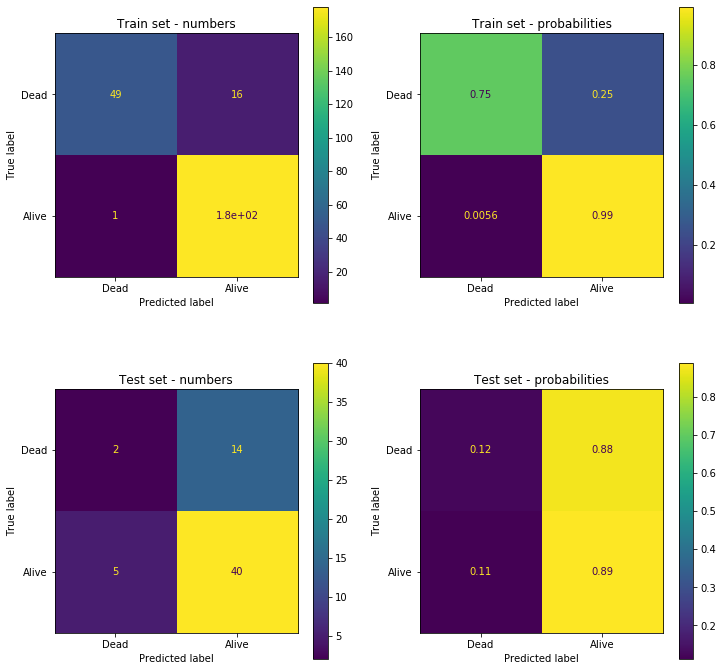

In [44]:
model = ensemble.RandomForestClassifier(n_estimators=best_train).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

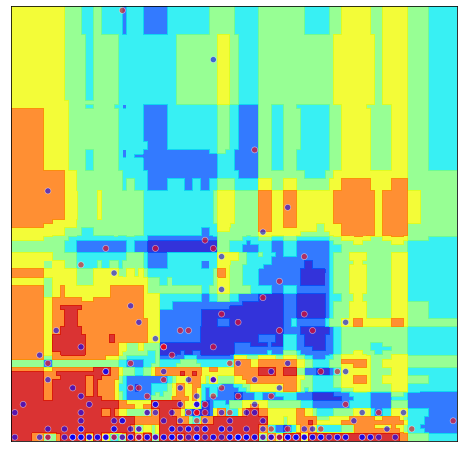

In [45]:
plot_tree_boundary(model, x_train, y_train)

Train set accuracy: 92.62%
Test set accuracy: 63.93%
Train set precision = 0.7846, fallout = 0.0741
Test set precision = 0.1250, fallout = 0.2745


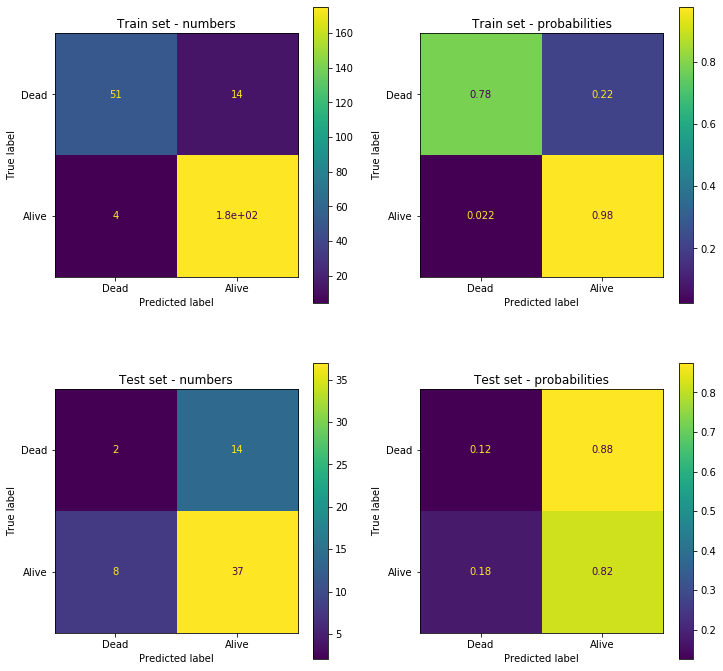

In [46]:
model = ensemble.RandomForestClassifier(n_estimators=best_valid).fit(x_train, y_train_1)
summary(model, x_train, x_test, y_train, y_test)

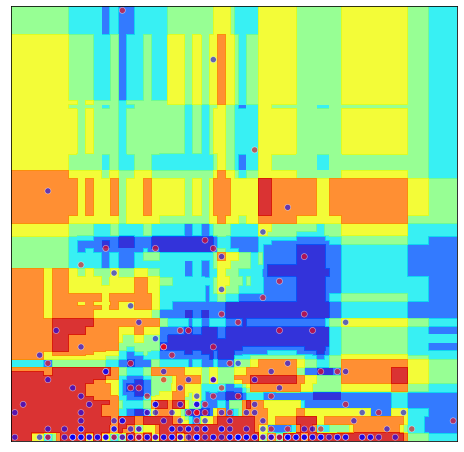

In [47]:
plot_tree_boundary(model, x_train, y_train)

## Conclusion

90% train accuracy does not lead to great predictions. it's overfitting

we ran summary() with best for valid set parameters for looking at possible results we could achieve. And still we have precision score close to 0.

## Factor variables

We will separate patients by 3 groups:

  0 - under 30 (there are no patients under 30 in this data set)

  1 - under 45

  2 - 45-60

  3 - 60+

And we will use 1,2,3 as age group marker

In [64]:
df_1 = df.copy()
df_1.loc[df["Age"] < 45, "Age"] = 1
df_1.loc[(45 <= df["Age"]) & (df["Age"] < 60), "Age"] = 2
df_1.loc[60 <= df["Age"], "Age"] = 3

In [70]:
X = df_1[["Age", "Positive nodes"]] # year is useless, ok?
x_train, x_test, y_train, y_test = train_test_split(X, df["Survival"], train_size=.8)

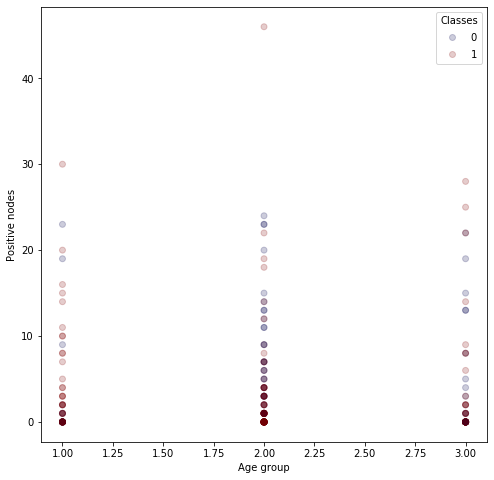

In [71]:
features = x_train.to_numpy()
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(features[:,0], features[:,1],
            alpha=0.2,
            #s=100*features[3], 
            c=y_train, cmap='seismic')
ax.set_xlabel("Age group")
ax.set_ylabel("Positive nodes")
ax.legend(*scatter.legend_elements(),
                  loc="upper right", 
                  title="Classes")

In [66]:
def short_summary(model, x_train, x_test, y_train, y_test):
    print(f"Train set accuracy: {model.score(x_train, y_train)*100:.2f}%")
    print(f"Test set accuracy: {model.score(x_test, y_test)*100:.2f}%")

    confusion_train = confusion_matrix(y_train, model.predict(x_train))
    confusion_test  = confusion_matrix(y_test, model.predict(x_test))

    precision_train = confusion_train[0,0] / (confusion_train[0,0] + confusion_train[0,1])
    precision_test  = confusion_test[0,0] / (confusion_test[0,0] + confusion_test[0,1])

    fallout_train = confusion_train[0,1] / (confusion_train[0,1] + confusion_train[1,1])
    fallout_test  = confusion_test[0,1] / (confusion_test[0,1] + confusion_test[1,1])

    print(f"Train set precision = {precision_train:.4f}, fallout = {fallout_train:.4f}")
    print(f"Test set precision = {precision_test :.4f}, fallout = {fallout_test :.4f}")


In [74]:
models = [
    tree.DecisionTreeClassifier,
    ensemble.AdaBoostClassifier,
    ensemble.GradientBoostingClassifier,
    ensemble.RandomForestClassifier
]
model_names = ["Decision Tree", "AdaBoost", 
               "Gradient Boosting", "Random Forest"]

In [76]:
for model, name in zip(models, model_names):
    print(f"\n{name} classifier summary:")
    short_summary(model().fit(x_train, y_train), 
                 x_train, x_test, y_train, y_test)


Decision Tree classifier summary:
Train set accuracy: 83.61%
Test set accuracy: 68.85%
Train set precision = 0.5323, fallout = 0.1450
Test set precision = 0.3158, fallout = 0.2653

AdaBoost classifier summary:
Train set accuracy: 79.10%
Test set accuracy: 70.49%
Train set precision = 0.2581, fallout = 0.2063
Test set precision = 0.1053, fallout = 0.2931

Gradient Boosting classifier summary:
Train set accuracy: 81.97%
Test set accuracy: 67.21%
Train set precision = 0.4032, fallout = 0.1745
Test set precision = 0.1053, fallout = 0.3036

Random Forest classifier summary:
Train set accuracy: 83.61%
Test set accuracy: 70.49%
Train set precision = 0.5161, fallout = 0.1485
Test set precision = 0.3158, fallout = 0.2600
